In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 
import os
import calendar
import time
import glob
import gc
import scipy.stats as stats

from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [656]:
my_cols = [
            'City',
            'Pop',
            'Violent_cr',
            'Mrdr_manslter',
            'Rape1',
            'Rape2',
            'Robbery',
            'Agg_asslt',
            'Prop_cr',
            'Burg',
            'Larc_thft',
            'Mtr_vhcl_thft',
            'Arson3'
            ]


In [657]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'English_United States.1252'

In [2241]:
df = pd.read_csv("crime_data_ny_2013.txt",encoding="utf-8", thousands=',')
df.head()

,City,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [2242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            0 non-null float64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           187 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ KB


In [2243]:
df.replace('', np.nan, inplace=True)

In [2244]:
df.isnull().sum()

City               0
Pop                0
Violent_cr         0
Mrdr_manslter      0
Rape1            348
Rape2              0
Robbery            0
Agg_asslt          0
Prop_cr            0
Burg               0
Larc_thft          0
Mtr_vhcl_thft      0
Arson3           161
dtype: int64

In [2245]:
df.fillna(0,inplace=True)
df.isnull().sum()

City             0
Pop              0
Violent_cr       0
Mrdr_manslter    0
Rape1            0
Rape2            0
Robbery          0
Agg_asslt        0
Prop_cr          0
Burg             0
Larc_thft        0
Mtr_vhcl_thft    0
Arson3           0
dtype: int64

In [2246]:
df = df.astype({            
                'City':'object',
                'Pop':'int64',
                'Violent_cr':'int64',
                'Mrdr_manslter':'int64',
                'Rape1':'int64',
                'Rape2':'int64',
                'Robbery':'int64',
                'Agg_asslt':'int64',
                'Prop_cr':'int64',
                'Burg':'int64',
                'Larc_thft':'int64',
                'Mtr_vhcl_thft':'int64',
                'Arson3':'int64'
                })

In [2247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            348 non-null int64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           348 non-null int64
dtypes: int64(12), object(1)
memory usage: 35.4+ KB


In [2248]:
features = pd.get_dummies(df['City'])
features['Robbery_Occured'] = np.where(df['Robbery']>0, 1, 0)
features['Murder_Occured'] = np.where(df['Mrdr_manslter']>0, 1, 0)


print(df['Robbery'].groupby(features['Robbery_Occured']).describe())
print(df['Mrdr_manslter'].groupby(features['Murder_Occured']).describe())


                  count    mean      std   min   25%   50%    75%       max
Robbery_Occured                                                            
0               139.000   0.000    0.000 0.000 0.000 0.000  0.000     0.000
1               209.000 121.388 1329.475 1.000 1.000 4.000 12.000 19170.000
                 count   mean    std   min   25%   50%   75%     max
Murder_Occured                                                      
0              299.000  0.000  0.000 0.000 0.000 0.000 0.000   0.000
1               49.000 11.122 48.098 1.000 1.000 1.000 3.000 335.000


In [2249]:

features.head()

,Adams Village,Addison Town and Village,Akron Village,Albany,Albion Village,Alfred Village,Allegany Village,Amherst Town,Amityville Village,Amsterdam,...,Whitehall Village,Whitesboro Village,Whitestown Town,Woodbury Town,Woodridge Village,Woodstock Town,Yonkers,Yorktown Town,Robbery_Occured,Murder_Occured
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2254]:
df2 = df.loc[((df["City"] != "")), 
                                    ["City",
                                    "Pop",
                                     "Mrdr_manslter",
                                    "Robbery",
                                    "Prop_cr"]]
df2["Pop_squared"] = np.square(df["Pop"])
df_jittered = df2.loc[:, "Pop":"Prop_cr"]
df_jittered2 = df_jittered
df_jittered2.shape[0]

348

In [2251]:

df_jittered2["Prop_cr"].dropna().sample(60).describe()

count     60.000
mean     379.667
std      730.600
min        0.000
25%       38.500
50%      100.000
75%      314.500
max     4090.000
Name: Prop_cr, dtype: float64

In [2252]:
df_jittered2[(df_jittered2["Prop_cr"] > 2000)] = 2000
print(df_jittered2["Prop_cr"].isnull().sum())
df_jittered2["Prop_cr"].describe()

0


count    348.000
mean     306.865
std      465.298
min        0.000
25%       40.500
50%      112.500
75%      341.000
max     2000.000
Name: Prop_cr, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


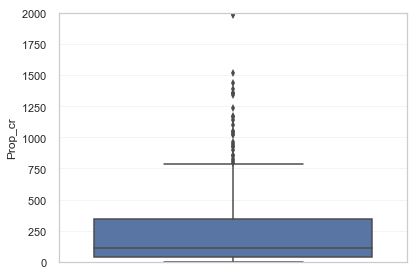

In [2195]:

sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Prop_cr"],data=df_jittered2)
plt.show()

In [2196]:

df_jittered2["Robbery"].dropna().sample(90).describe()

count     90.000
mean      93.544
std      413.607
min        0.000
25%        0.000
50%        1.000
75%        5.000
max     2000.000
Name: Robbery, dtype: float64

In [2197]:
df_jittered2[(df_jittered2["Robbery"] > 50)] =50
print(df_jittered2["Robbery"].isnull().sum())
df_jittered2["Robbery"].describe()

0


count   348.000
mean      6.457
std      12.848
min       0.000
25%       0.000
50%       1.000
75%       5.000
max      50.000
Name: Robbery, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


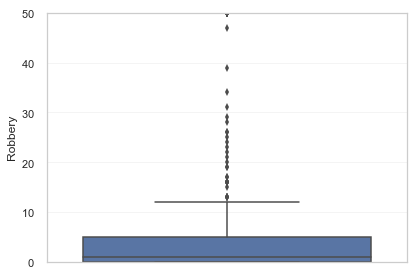

In [2198]:
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Robbery"],data=df_jittered2)
plt.show()

In [2255]:

df_jittered2["Mrdr_manslter"].dropna().sample(90).describe()

count   90.000
mean     0.656
std      5.015
min      0.000
25%      0.000
50%      0.000
75%      0.000
max     47.000
Name: Mrdr_manslter, dtype: float64

In [2256]:
df_jittered2[(df_jittered2["Mrdr_manslter"] > 5)] = 5
print(df_jittered2["Mrdr_manslter"].isnull().sum())
df_jittered2["Mrdr_manslter"].describe()

0


count   348.000
mean      0.299
std       0.968
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       5.000
Name: Mrdr_manslter, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


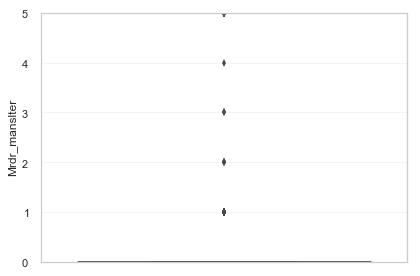

In [2257]:
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Mrdr_manslter"],data=df_jittered2)
plt.show()

In [2202]:

df_jittered2["Pop"].dropna().sample(90).describe()

count      90.000
mean     8838.544
std     12819.907
min         5.000
25%      1956.750
50%      4554.000
75%      9507.750
max     87204.000
Name: Pop, dtype: float64

In [2203]:
df_jittered2[(df_jittered2["Pop"] > 100000)] = 100000
print(df_jittered2["Pop"].isnull().sum())
df_jittered2["Pop"].describe()

0


count     348.000
mean    10643.204
std     12761.304
min         5.000
25%      2404.250
50%      5950.500
75%     14163.750
max     87204.000
Name: Pop, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


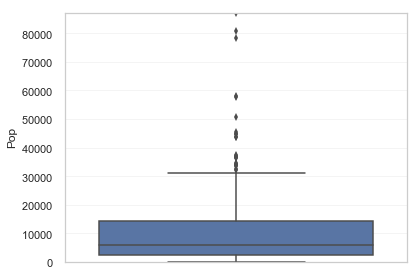

In [2204]:
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Pop"],data=df_jittered2)
plt.show()

In [2222]:
features['Murder_Occured'].describe()

count   348.000
mean      0.141
std       0.348
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       1.000
Name: Murder_Occured, dtype: float64

In [2205]:
# Make the correlation matrix.
corrmat = df_jittered2.corr()
print(corrmat)

                 Pop  Mrdr_manslter  Robbery  Prop_cr
Pop            1.000         -0.077    0.634    0.818
Mrdr_manslter -0.077          1.000    0.189   -0.059
Robbery        0.634          0.189    1.000    0.762
Prop_cr        0.818         -0.059    0.762    1.000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


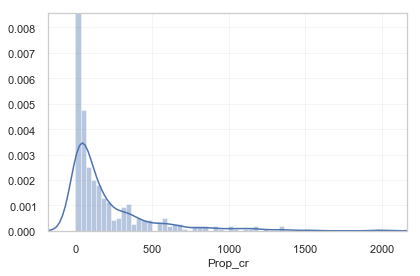

In [2206]:

g = sns.distplot(df_jittered2["Prop_cr"],bins=60)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


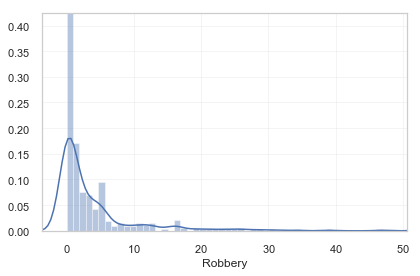

In [2207]:
g = sns.distplot(df_jittered2["Robbery"],bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


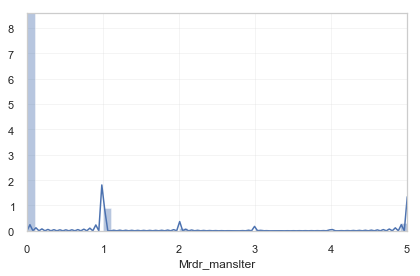

In [2258]:
g = sns.distplot(df_jittered2["Mrdr_manslter"],bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


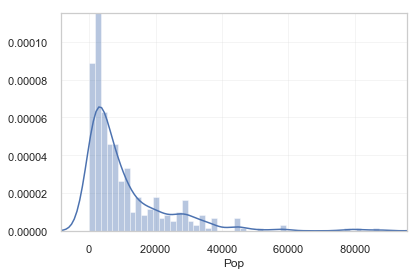

In [2209]:
g = sns.distplot(df_jittered2["Pop"],bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


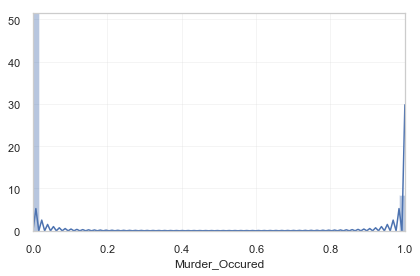

In [2226]:
g = sns.distplot(features['Murder_Occured'],bins=60)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


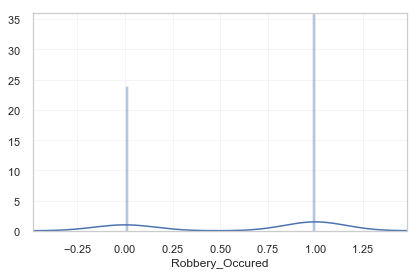

In [2232]:
sns.distplot(features['Robbery_Occured'],bins=60)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


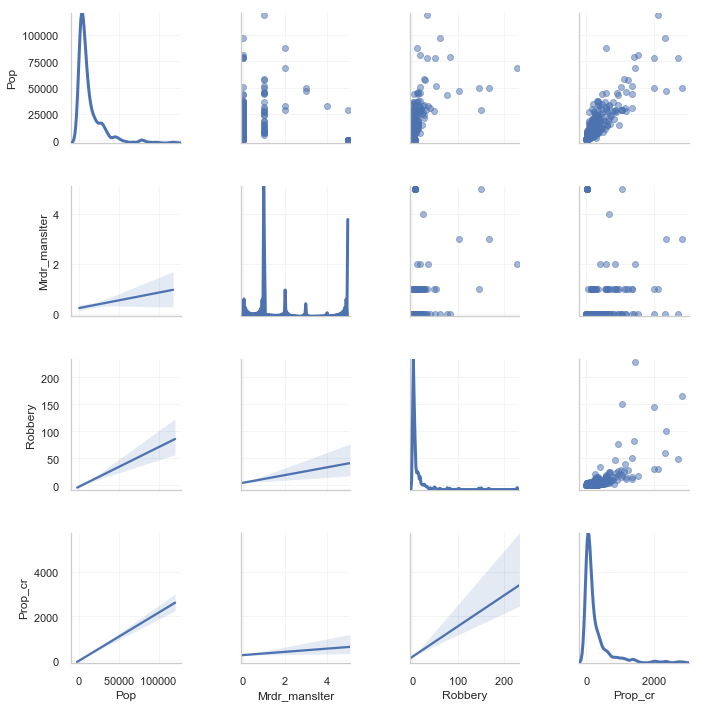

In [2259]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered2, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()